In [280]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [282]:
df=pd.read_csv("C:\\Users\\Sahil_K\\Downloads\\Housing.csv")
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [284]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [286]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [288]:
from sklearn.preprocessing import LabelEncoder

In [290]:
df['mainroad']=df['mainroad'].map({'yes':1,'no':0})
df['guestroom']=df['guestroom'].map({'yes':1,'no':0})
df['basement']=df['basement'].map({'yes':1,'no':0})
df['hotwaterheating']=df['hotwaterheating'].map({'yes':1,'no':0})
df['airconditioning']=df['airconditioning'].map({'yes':1,'no':0})
df['furnishingstatus']=df['furnishingstatus'].map({'unfurnished':0,'semi-furnished':1,'furnished':2})

In [292]:
df['prefarea']=df['prefarea'].map({'yes':1,'no':0})

In [295]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


In [297]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [299]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler_minmax = MinMaxScaler()

In [301]:
df[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom','basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus'
]]= scaler_minmax.fit_transform(df[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom','basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus'
]])

In [303]:
df= pd.DataFrame(df)

In [305]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,1.0
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,1.0
2,0.909091,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,0.5
3,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,1.0
4,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.006061,0.092784,0.2,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.666667,0.0,0.0
541,0.001485,0.051546,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.5
542,0.000000,0.135395,0.2,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
543,0.000000,0.086598,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0


In [325]:
print(type(df))



<class 'pandas.core.frame.DataFrame'>


In [328]:
X = df.drop(columns=['price'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [330]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [332]:

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [334]:
y_pred = model.predict(X_test)


In [342]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [344]:
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² (R-squared):", r2)

Mean Absolute Error (MAE): 0.08482075249315936
Mean Squared Error (MSE): 0.01328124372927074
R² (R-squared): 0.6494754192267793


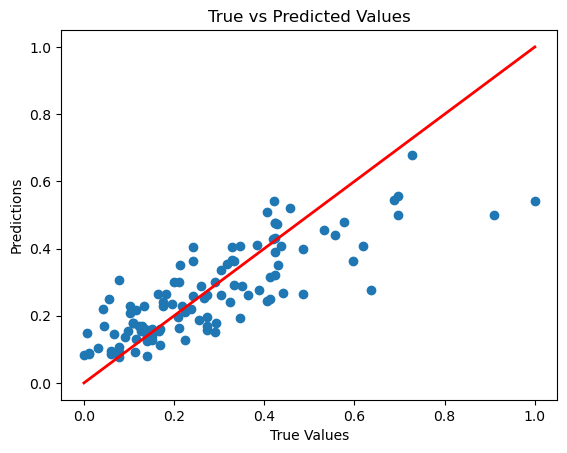

In [346]:
import matplotlib.pyplot as plt

# We will plot a scatter plot for the true vs predicted values
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()